## GAGARIN CRAWLING

Для того, чтобы вытащить все тексты с сайта новостей нам потребуется bs4. 

In [2]:
from bs4 import BeautifulSoup
import requests
import re

Фунция, которая находит автора, ищет все теги p с атрибутами стиля 'text-align: right;'. Если автора нет, функция возвращает строковое значение None

In [15]:
def get_author(u):
    get_u = requests.get(u).text
    soup = BeautifulSoup(get_u, 'html.parser')

    another_div_parse = soup.find_all('div', class_='entry')

    findin_loc_of_author = another_div_parse[0].find('p', attrs={'style': 'text-align: right;'})
    if findin_loc_of_author:
        findin_author = findin_loc_of_author.find('em')
        if findin_author:
            return findin_author.text
        else:
            return str(None)
    else:
        return str(None)

Фунция, которая находит дату, ищет все теги h4, однако в этом теге есть еще текст. Используя регулярные выражения, находим год, делаем цикл, в котором названия месяцев меняется на циферки. Возвращаем нормальную дату.

In [12]:
def get_date(u):
    get_u = requests.get(u).text
    soup = BeautifulSoup(get_u, 'html.parser')
    another_div = soup.find_all('div', id='content_box')
    findin_date = another_div[0].find('h4')
    datee = str(findin_date.text)

    day = datee[:2]
    pattern_year = '[а-яА-Я]+,\s(\d{4})'
    year = re.search(pattern_year, datee)
    year = str(year.group(1))

    pattern = r'[а-яА-Я]+'
    result_ = re.findall(pattern, datee)
    
    results_month = ['января', 'февраля', 'марта', 'апреля', 'мая', 'июня', 'июля', 'августа', 'сентября', 'октября', 'ноября', 'декабря']

    for month in results_month:
      if result_[0] == month:
        mmonth = results_month.index(month) + 1

        if mmonth < 10:
            mon = '0' + str(mmonth)
        else:
            mon = str(mmonth)
            
        # return mmonth

    date_ = str(day) + '.' + mon + '.' + year
    # datetime.date(year, month, day)

    return date_

Функция, получающая название статьи. Просто ищем тег h2, радуемся жизни. 

In [13]:
def get_name(u):
    get_u = requests.get(u).text
    soup = BeautifulSoup(get_u, 'html.parser')
    another_div = soup.find_all('div', id='content', class_='posts')
    findin_name = another_div[0].find('h2')

    return findin_name.text

Получаем список всех урлов (за исключением ссылок на картинки, потому что они никому не нужны)

In [20]:
def get_urls():
    urls = []
    for i in range(410):
        try:
            url_template = 'http://gagarin-gazeta.ru/page/' + str(i)
            url = requests.get(url_template).text
            soup = BeautifulSoup(url, 'html.parser')
        
            div_parse = soup.find('div', class_='entry')
            if div_parse:
                a_parse = div_parse.find_all('a', href=True)
                if a_parse:
                    for a in a_parse:
                        if a == None:
                            pass
                        else:   
                            
                            gag_pattern = r'^http://gagarin-gazeta.ru'
                            r_gag = re.search(gag_pattern, a['href'])
                            
                            if r_gag:
                                jpg_pattern = r'.jpg$'
                                r_jpg = re.search(jpg_pattern, a['href'])
                                png_pattern = r'.png$'
                                r_png = re.search(png_pattern, a['href'])
                                
                                if r_jpg == None and r_png == None:
                                    urls.append(a['href'])
                            
                            
        except TimeoutError:
            pass
        
    
    return urls

['http://gagarin-gazeta.ru/2020-03-23/oni-srazhalis-za-rodinu/',
 'http://gagarin-gazeta.ru/2020-03-23/pod-dozhdyom-iz-pul/',
 'http://gagarin-gazeta.ru/2020-03-24/zharko-bylo-pod-odessoj/',
 'http://gagarin-gazeta.ru/2020-03-24/podrostok-tokar-v-blokadnom-leningrade/',
 'http://gagarin-gazeta.ru/2020-03-24/pod-krylom-samolyota/',
 'http://gagarin-gazeta.ru/2020-03-24/za-rodinu-i-za-svoih-bratev/',
 'http://gagarin-gazeta.ru/2020-03-25/ranen-pri-forsirovanii-reki-oder/',
 'http://gagarin-gazeta.ru/2020-03-25/krasnet-za-menya-ne-pridetsya/',
 'http://gagarin-gazeta.ru/2020-03-25/minomyotnyj-raschyot-shyol-k-berlinu/',
 'http://gagarin-gazeta.ru/2020-03-25/osvobozhdal-gzhatsk/',
 'http://gagarin-gazeta.ru/2020-03-26/zashhitnik-i-stroitel/',
 'http://gagarin-gazeta.ru/2020-03-23/pogib-za-polskij-zhirarduv/',
 'http://gagarin-gazeta.ru/2020-03-24/o-soldatah-pisat-ne-ustanu/',
 'http://gagarin-gazeta.ru/2020-03-24/serdobolnyj-notarius/',
 'http://gagarin-gazeta.ru/2020-03-24/hirurg-evakogos

Формируем txt файл, который от нас хотели. 

In [21]:
urls = get_urls()

with open('gagarin.txt', 'w', encoding='utf-8') as gg:
    gg.write('')
    
with open('gagarin.txt', 'a', encoding='utf-8') as gag:
    for u in urls:
        try:
            get_u = requests.get(u, timeout = 2).text
            soup = BeautifulSoup(get_u, 'html.parser')

            another_div_parse = soup.find('div', class_='entry')
        
            if another_div_parse:
                findin_content = another_div_parse.find_all('p', attrs={'style': 'text-align: left;'})

                f = [(c.get_text() + ' ') for c in findin_content]

                content = ''.join(f)

                gag.write('=====' + '\n' + u + '\n' + 'Гжатский вестник' + '\n')
                gag.write(get_date(u) + '\n' + str(get_author(u)) + '\n' + str(get_name(u)) + '\n')
                gag.write(content + '\n')
        
        except TimeoutError or requests.exceptions.RequestException or ReadTimeoutError:
            pass
    

## NATASHA AND HER FRIEND GRAPH

Импортируем нужные модули, устанавливаем штуки для Наташи

In [29]:
from itertools import permutations

!pip install natasha

from natasha import Segmenter, MorphVocab, NewsEmbedding, NewsMorphTagger, NewsSyntaxParser, NewsNERTagger, LOC, NamesExtractor, DatesExtractor, MoneyExtractor, AddrExtractor, Doc

# region создаём какие-то штуки 
segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)
names_extractor = NamesExtractor(morph_vocab)

addr_extractor = AddrExtractor(morph_vocab)


Создаем список всех связей. Храним их теперь там. 

In [24]:
list_of_connections = []
with open('gagarin.txt', encoding='utf-8') as gagarin:
    text = gagarin.read()
    text = re.findall(r'==\n.+\n.+\n.+\n.+\n.+\n(.+)\n===', text)
  
  for t in text:  
    h = list(addr_extractor(t))
    val_pattern = r"value='(.+?)'"
    value_result = re.findall(val_pattern, str(h))
    connections = permutations(value_result, 2)
    for p in connections:
        list_of_connections.append(p)

Вот что получается (круто, да?)

In [28]:
data = list_of_connections
print(data[0])

('Москвы', 'Годуновка')


Рисуем график с помощью matplotlib'а. Он получился не очень похож на карту, но там прикольное расположение Томска (он также далеко, как ирл!)

In [26]:
import matplotlib.pyplot as plt
import networkx as nx

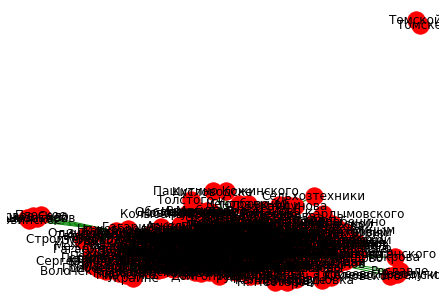

In [27]:
def buildGraph(data):
    G1 = nx.Graph()
    for p1, p2 in data:
          G1.add_edge(p1, p2)
    return G1


def drawGraph(G):
    pstn = nx.spring_layout(G)
    _ = nx.draw(G, pos=pstn, with_labels=True, node_color='r', edge_color='g')


def buildAndDrawGraph(data):
    G1 = buildGraph(data)
    drawGraph(G1)
    return G1

buildAndDrawGraph(data)